# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

### Setup & Visit Website

In [2]:
# Import necessary modules
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Open the browser
browser = Browser('chrome')

In [4]:
# Visit the Mars Temperature Data Site
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Scrape the Table

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table')

### Store the Data

In [7]:
test = table.find(class_='data-row').text.split()
test

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [8]:
# Identify header row
headerrow = table.find_all('th')
header = []
for col in headerrow:
    col = col.text.strip()
    header.append(col)
header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [38]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
allrows = table.select('tr.data-row')
for row in allrows:
    use = row.text.split()
    rows.append(use)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data=rows, columns=header)

# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Prepare Data for Analysis

In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Adjust data types for data analysis

# Convert date object --> datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert sol, ls, & month --> integers
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert temp & pressure --> floats
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Confirm type changes were successful  q
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Analyze the Data

In [13]:
# 1. How many months are there on Mars?
months_on_mars = df['month'].nunique()
months_on_mars

12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
days_of_data = df['sol'].nunique()
days_of_data

1867

In [15]:
# 3a. What is the average minimum temperature by month?
temp_by_month = df.groupby(['month'])['min_temp'].mean()
temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [16]:
# Note: before we start plotting results, I want to use the degrees symbol (chr 176)
c = f'(C{chr(176)})'

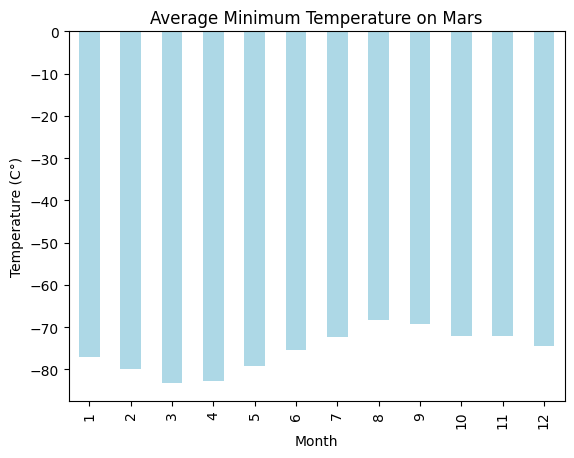

In [17]:
# 3b. Plot the average minimum temperature by month
temp_by_month.plot.bar(color='lightblue')
plt.ylabel(f'Temperature {c}')
plt.xlabel('Month') # fix capitalization
plt.title('Average Minimum Temperature on Mars')

# Save image
plt.savefig('Output/temp_by_month.png')

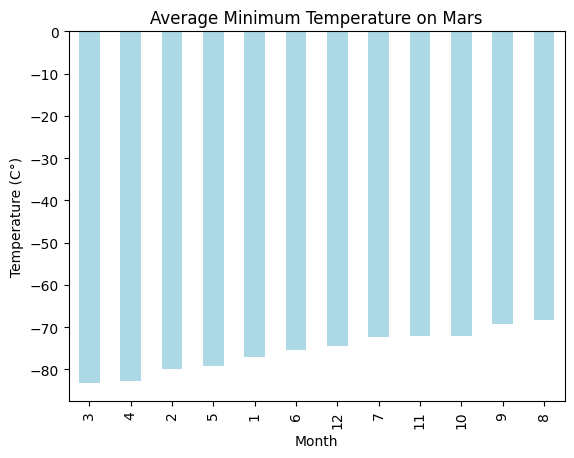

In [18]:
# 3c. Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp_by_month = temp_by_month.sort_values()
sorted_temp_by_month.plot.bar(color='lightblue')
plt.ylabel(f'Temperature {c}')
plt.xlabel('Month') # fix capitalization
plt.title('Average Minimum Temperature on Mars')

# Save image
plt.savefig('Output/temp_by_month_sorted.png')

In [27]:
# 3d. Save warmest & coldest months as seen in the plot
coldest = 3
warmest = 8

In [19]:
# 4a. What is the average pressure by month?
pressure_by_month = df.groupby(['month'])['pressure'].mean()
pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

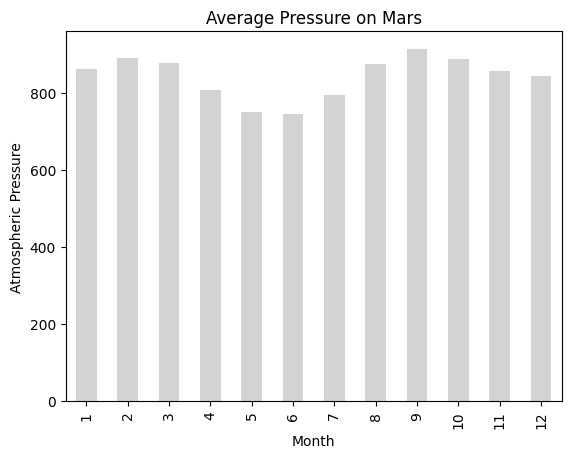

In [35]:
# 4b. Plot the average pressure by month
pressure_by_month.plot.bar(xlabel='Month', ylabel='Atmospheric Pressure', title='Average Pressure on Mars', color='lightgray')


# Save image
plt.savefig('Output/pressure_by_month.png')

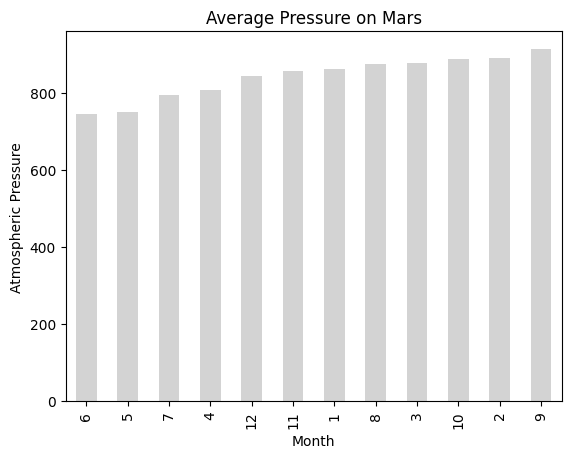

In [36]:
# 4c. Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_by_month.sort_values().plot.bar(xlabel='Month', ylabel='Atmospheric Pressure', title='Average Pressure on Mars', color='lightgray')


# Save image
plt.savefig('Output/pressure_by_month_sorted.png')

In [26]:
# 4d. Save lowest & highest pressure months as seen in the plot
lowest = 6
highest = 9

<Axes: title={'center': 'Min. Temperature over Time'}, xlabel='Number of terrestrial days', ylabel='Min. Temperature (C°)'>

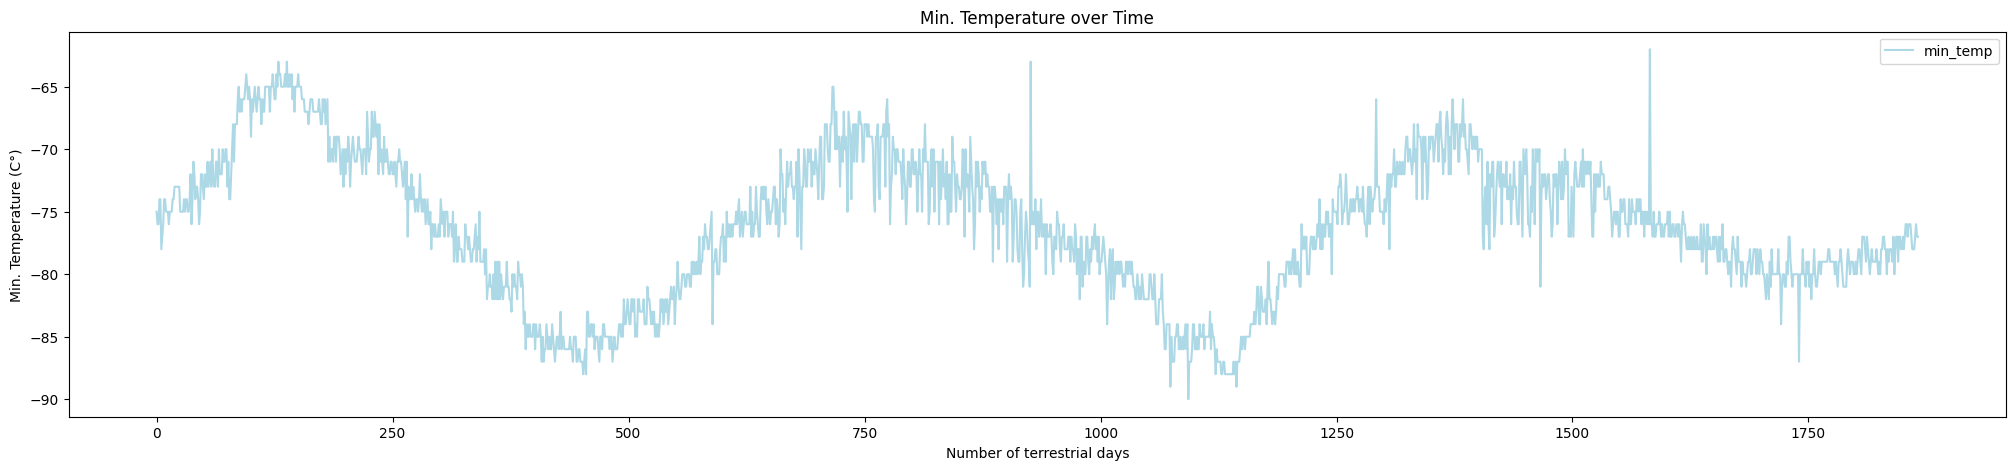

In [22]:
# 5a. How many terrestrial (Earth) days are there in a Martian year?
df.plot.line(y='min_temp', title='Min. Temperature over Time', xlabel='Number of terrestrial days', ylabel=f'Min. Temperature {c}', color='lightblue', figsize=(25,5))

In [28]:
# 5b. Visually estimate the number of days in a Martian year by looking at the plot above
year_length = 600

### Save & Export Data

In [39]:
# Create string w/ analysis summary
findings = f'''### Findings
- {months_on_mars} months exist on Mars
- {days_of_data} Martian days of recorded data
- According to Curiosity's data, month {coldest} is the coldest on Mars, and month {warmest} is the warmest. 
- Month {lowest} has the lowest atmospheric pressure, and month {highest} has the highest atmospheric pressure. 
- Roughly {year_length} terrestrial days exist on Mars'''

In [40]:
# Write results to a text file
with open("Output/findings.txt", "w") as file:
    file.write(findings)

In [33]:
# Write the data to a CSV
df.to_csv('Output/mars_weather.csv')

In [34]:
# Close the browser
browser.quit()